# Comprensión de los datos



## Carga del dataset

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spotify_dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Descripción básica del dataset

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [50]:
df.isna().sum().sum()

np.int64(3)

##Estadisticas descriptivas



###Eliminar columna extra

In [51]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


#### Estadísticas numéricas

In [52]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996
instrumentalness,114000.0,0.156050,0.309555,0.000,0.00000,0.000042,0.0490,1.000


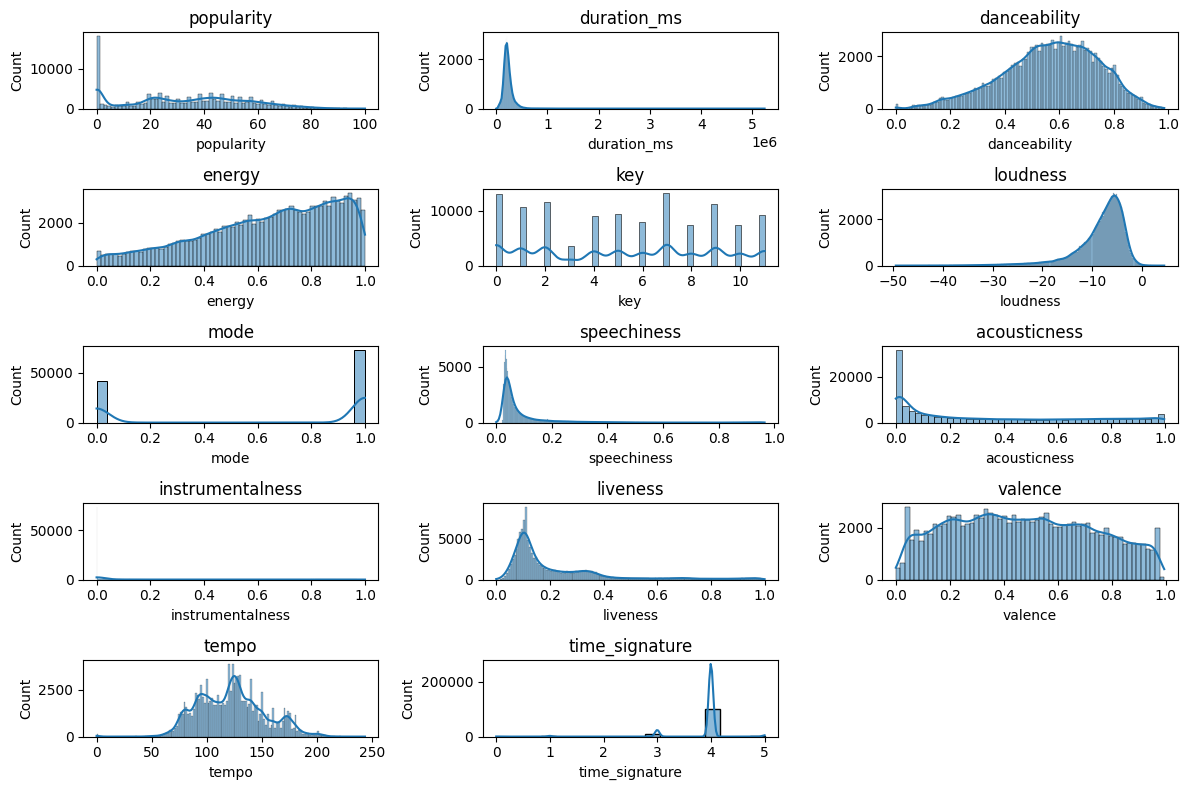

In [54]:
import math

num_cols = numeric_columns

n = len(numeric_columns)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

#### Estadísticas categóricas




En las diferentes categorías se observa que hay valores que se repiten, incluso el mismo id, por lo que se infiere que existen duplicados.

In [30]:
print("\nFrecuencia de valores categóricos:")
for col in df.select_dtypes(include="object").columns[0:5]:  # primeras 3 categóricas
    print(f"\nColumna: {col}")
    print(df[col].value_counts().head())


Frecuencia de valores categóricos:

Columna: track_id
track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
4WJTKbNJQ41zXnb84jSWaj    7
2aaClnypAakdAmLw74JXxB    7
Name: count, dtype: int64

Columna: artists
artists
The Beatles        279
George Jones       271
Stevie Wonder      236
Linkin Park        224
Ella Fitzgerald    222
Name: count, dtype: int64

Columna: album_name
album_name
Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    184
Metal                          143
Halloween con perreito         123
Halloween Party 2022           115
Name: count, dtype: int64

Columna: track_name
track_name
Run Rudolph Run                   151
Halloween                          88
Frosty The Snowman                 81
Little Saint Nick - 1991 Remix     76
Last Last                          75
Name: count, dtype: int64

Columna: track_genre
track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient 

#Exploración de datos

##Duplicados

In [31]:
duplicados_totales = df.duplicated().sum()
print("Duplicados dataset:", duplicados_totales)


Duplicados dataset: 450


In [32]:
multi_generos = df.groupby("track_id")["track_genre"].nunique()
print("Canciones con más de un género:", (multi_generos > 1).sum())


Canciones con más de un género: 16299


In [33]:
df[df.duplicated(subset=["track_id"], keep=False)].sort_values("track_id").head(10)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15028,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.31600,0.000001,0.1170,0.406,143.064,4,chill
103211,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.31600,0.000001,0.1170,0.406,143.064,4,soul
85578,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.01940,0.088100,0.3290,0.700,183.571,1,punk-rock
100420,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.01940,0.088100,0.3290,0.700,183.571,1,ska
91801,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,rock
3257,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,alternative
2106,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,alt-rock
33178,004h8smbIoAkUNDJvVKwkG,Ouse;Powfu,Loners Diary,Lovemark,58,219482,True,0.808,0.331,5,-13.457,1,0.0557,0.13100,0.000000,0.2250,0.337,140.035,4,emo
94239,004h8smbIoAkUNDJvVKwkG,Ouse;Powfu,Loners Diary,Lovemark,58,219482,True,0.808,0.331,5,-13.457,1,0.0557,0.13100,0.000000,0.2250,0.337,140.035,4,sad
97533,006rHBBNLJMpQs8fRC2GDe,Calcinha Preta;Gusttavo Lima,CP 25 Anos (Ao Vivo em Aracaju),Agora Estou Sofrendo - Ao Vivo,47,260510,False,0.605,0.678,0,-3.257,1,0.0311,0.64200,0.000000,0.1570,0.439,125.059,4,sertanejo


la mayoria tiene un solo genero y solo un minimo tinen mas de 2

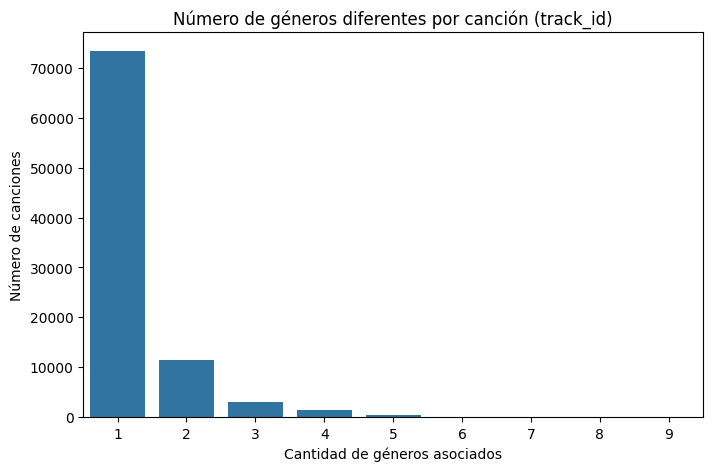

In [55]:
# Contar cuántos géneros distintos tiene cada track_id
multi_generos = df.groupby("track_id")["track_genre"].nunique()

# Histograma de la cantidad de géneros por canción
plt.figure(figsize=(8,5))
sns.countplot(x=multi_generos)
plt.title("Número de géneros diferentes por canción (track_id)")
plt.xlabel("Cantidad de géneros asociados")
plt.ylabel("Número de canciones")
plt.show()


#Visualizaciones

###Distribución de la popularidad

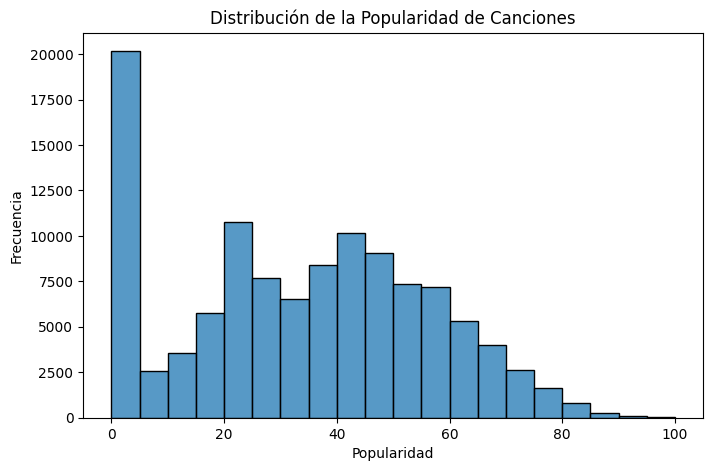

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(df['popularity'], bins=20, kde=False)
plt.title("Distribución de la Popularidad de Canciones")
plt.xlabel("Popularidad")
plt.ylabel("Frecuencia")
plt.show()


###Gráfica de popularidad por género

/tmp/ipython-input-705497279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')


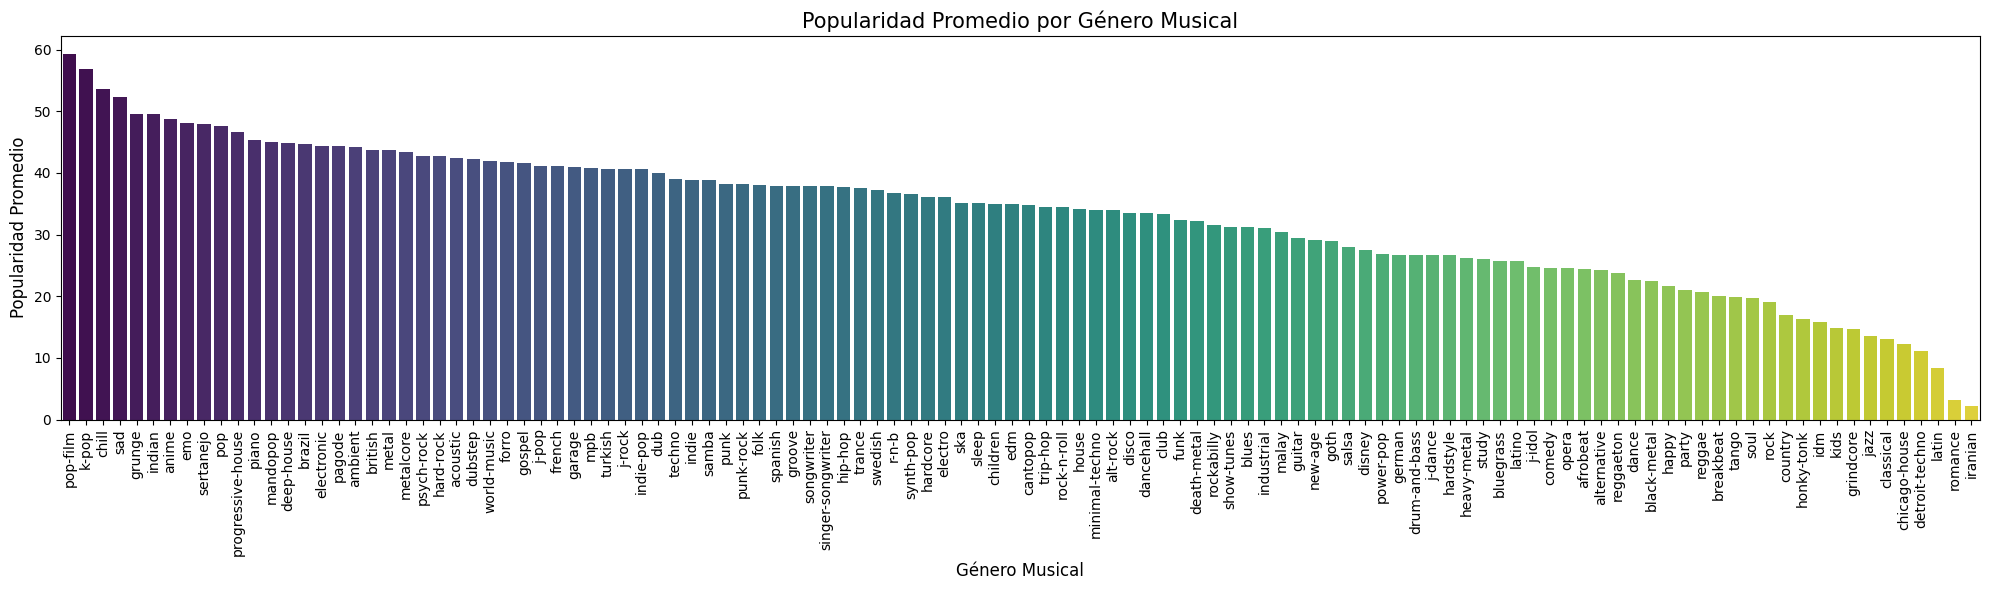

In [36]:
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 6))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Género Musical', fontsize=12)
plt.ylabel('Popularidad Promedio', fontsize=12)
plt.title('Popularidad Promedio por Género Musical', fontsize=15)
plt.tight_layout()
plt.show()

###¿Cuáles son todos los géneros?

In [37]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

Se puede observar que hay muchos generos, por lo que se decide explorar agrupando los géneros tan especificos con los que cuenta el dataset en géneros más generales.

###Agrupación por género principal

Se asigna el genero principal para cada canción y se realiza One Hot Encoding para convertirlo en variables numéricas que puedan ser utilizadas por un modelo en un futuro.

In [38]:
genre_mapping = {
    'rock': 'Rock/Metal', 'alternative': 'Rock/Metal', 'alt-rock': 'Rock/Metal',
    'grunge': 'Rock/Metal', 'punk-rock': 'Rock/Metal', 'hard-rock': 'Rock/Metal',
    'heavy-metal': 'Rock/Metal', 'metal': 'Rock/Metal', 'metalcore': 'Rock/Metal',
    'hardcore': 'Rock/Metal', 'goth': 'Rock/Metal', 'punk': 'Rock/Metal',
    'rock-n-roll': 'Rock/Metal', 'garage': 'Rock/Metal', 'indie-rock': 'Rock/Metal',
    'edm': 'Electrónica/Dance', 'electronic': 'Electrónica/Dance', 'house': 'Electrónica/Dance',
    'deep-house': 'Electrónica/Dance', 'techno': 'Electrónica/Dance', 'progressive-house': 'Electrónica/Dance',
    'dubstep': 'Electrónica/Dance', 'trance': 'Electrónica/Dance', 'disco': 'Electrónica/Dance',
    'drum-and-bass': 'Electrónica/Dance', 'breakbeat': 'Electrónica/Dance', 'dub': 'Electrónica/Dance',
    'pop': 'Pop/Comercial', 'indie-pop': 'Pop/Comercial', 'latin': 'Pop/Comercial',
    'k-pop': 'Pop/Comercial', 'pop-film': 'Pop/Comercial', 'power-pop': 'Pop/Comercial',
    'reggaeton': 'Pop/Comercial', 'latin-pop': 'Pop/Comercial', 'salsa': 'Pop/Comercial',
    'acoustic': 'Clásica/Acústica', 'classical': 'Clásica/Acústica', 'opera': 'Clásica/Acústica',
    'jazz': 'Clásica/Acústica', 'blues': 'Clásica/Acústica', 'folk': 'Clásica/Acústica',
    'afrobeat': 'Música del Mundo', 'brazil': 'Música del Mundo', 'forro': 'Música del Mundo',
    'mandopop': 'Música del Mundo', 'canto-pop': 'Música del Mundo', 'samba': 'Música del Mundo',
    'salsa': 'Música del Mundo', 'tango': 'Música del Mundo', 'synth-pop': 'Música del Mundo',
    'world-music': 'Música del Mundo', 'j-pop': 'Música del Mundo', 'k-pop': 'Música del Mundo',
    'indian': 'Música del Mundo', 'iranian': 'Música del Mundo', 'turkish': 'Música del Mundo',
    'ambient': 'Experimental/Alternativa', 'psychedelic-rock': 'Experimental/Alternativa',
    'industrial': 'Experimental/Alternativa', 'experimental': 'Experimental/Alternativa',
    'deep-house': 'Experimental/Alternativa', 'chill': 'Experimental/Alternativa',
    'minimal': 'Experimental/Alternativa', 'idm': 'Experimental/Alternativa', 'trip-hop': 'Experimental/Alternativa',
    'anime': 'Otros', 'comedy': 'Otros', 'kids': 'Otros', 'sleep': 'Otros', 'study': 'Otros',
    'honky-tonk': 'Otros', 'show-tunes': 'Otros', 'singer-songwriter': 'Otros'
}

df['main_genre'] = df['track_genre'].map(genre_mapping)

main_genres = ['Rock/Metal', 'Electrónica/Dance', 'Pop/Comercial', 'Clásica/Acústica',
               'Música del Mundo', 'Experimental/Alternativa', 'Otros']

for genre in main_genres:
    df[genre] = df['main_genre'].apply(lambda x: 1 if x == genre else 0)

df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,time_signature,track_genre,main_genre,Rock/Metal,Electrónica/Dance,Pop/Comercial,Clásica/Acústica,Música del Mundo,Experimental/Alternativa,Otros
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,4,acoustic,Clásica/Acústica,0,0,0,1,0,0,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,4,acoustic,Clásica/Acústica,0,0,0,1,0,0,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,4,acoustic,Clásica/Acústica,0,0,0,1,0,0,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,3,acoustic,Clásica/Acústica,0,0,0,1,0,0,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,4,acoustic,Clásica/Acústica,0,0,0,1,0,0,0


###Gráfico de barras de popularidad por género principal

/tmp/ipython-input-2591924964.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')


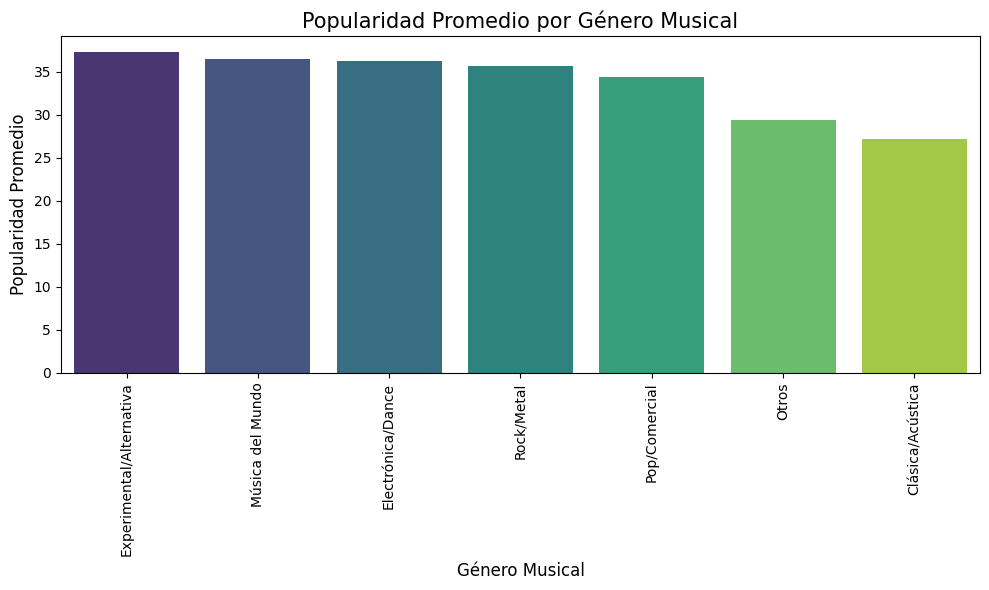

In [39]:
genre_popularity = df.groupby('main_genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Género Musical', fontsize=12)
plt.ylabel('Popularidad Promedio', fontsize=12)
plt.title('Popularidad Promedio por Género Musical', fontsize=15)
plt.tight_layout()
plt.show()

###Gráfico de cajas y bigotes de popularidad por género principal

/tmp/ipython-input-2428886338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='main_genre', y='popularity', data=df, palette='viridis')


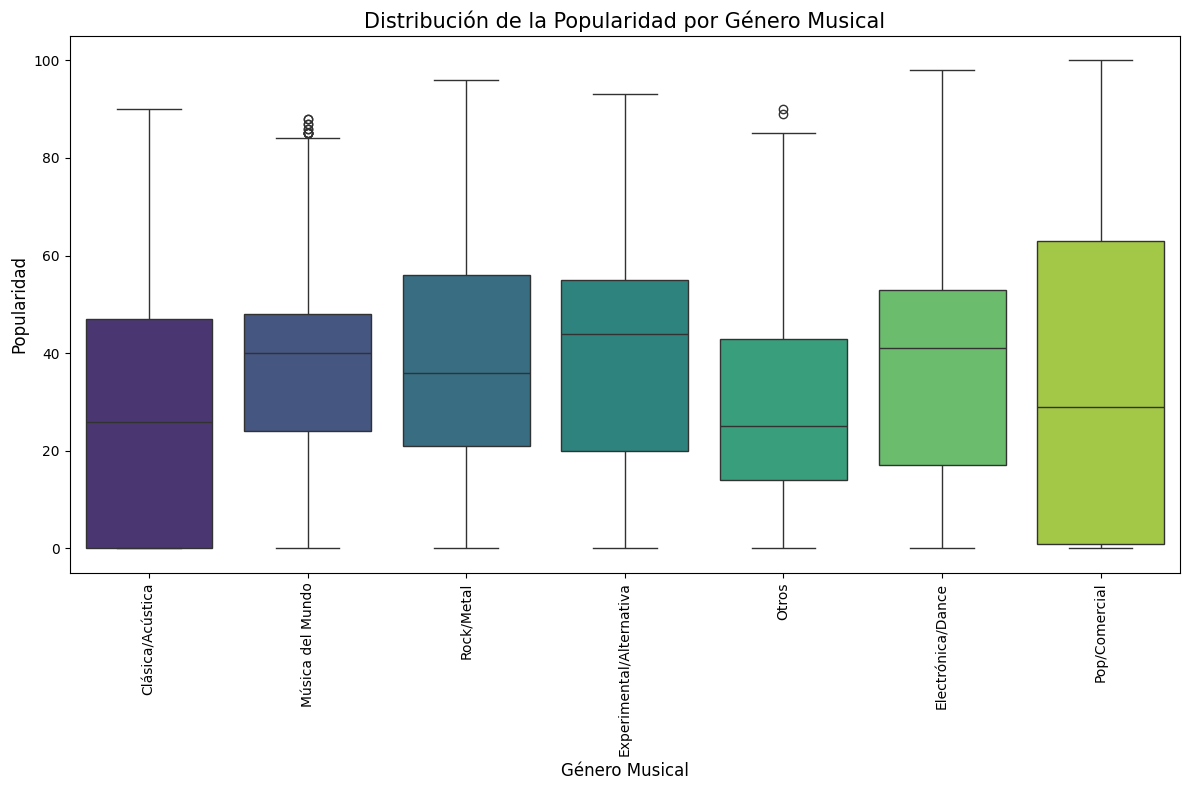

In [40]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='main_genre', y='popularity', data=df, palette='viridis')

plt.xticks(rotation=90)
plt.xlabel('Género Musical', fontsize=12)
plt.ylabel('Popularidad', fontsize=12)
plt.title('Distribución de la Popularidad por Género Musical', fontsize=15)
plt.tight_layout()

plt.show()

###Impacto de canciones explícitas en la popularidad

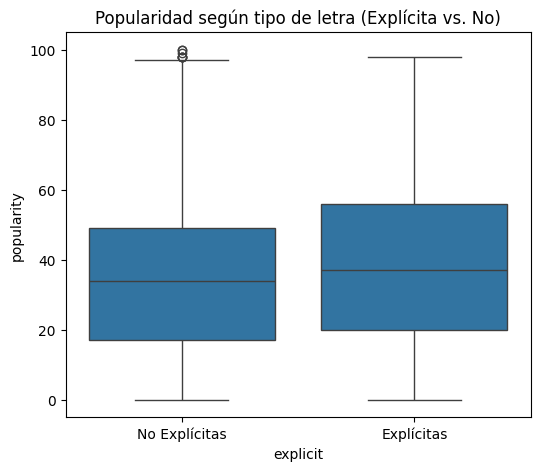

In [41]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="explicit", y="popularity")
plt.xticks([0,1], ["No Explícitas", "Explícitas"])
plt.title("Popularidad según tipo de letra (Explícita vs. No)")
plt.show()


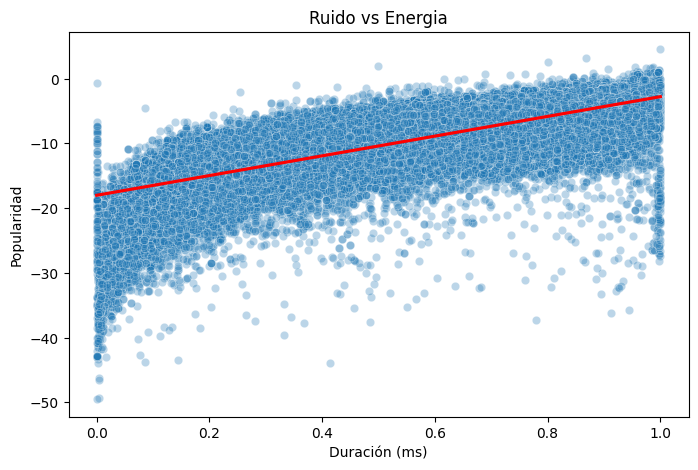

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="energy", y="loudness", alpha=0.3)
sns.regplot(data=df, x="energy", y="loudness", scatter=False, color="red")
plt.title("Ruido vs Energia")
plt.xlabel("Duración (ms)")
plt.ylabel("Popularidad")
plt.show()


###¿qué géneros son más bailables, más acústicos, más felices?

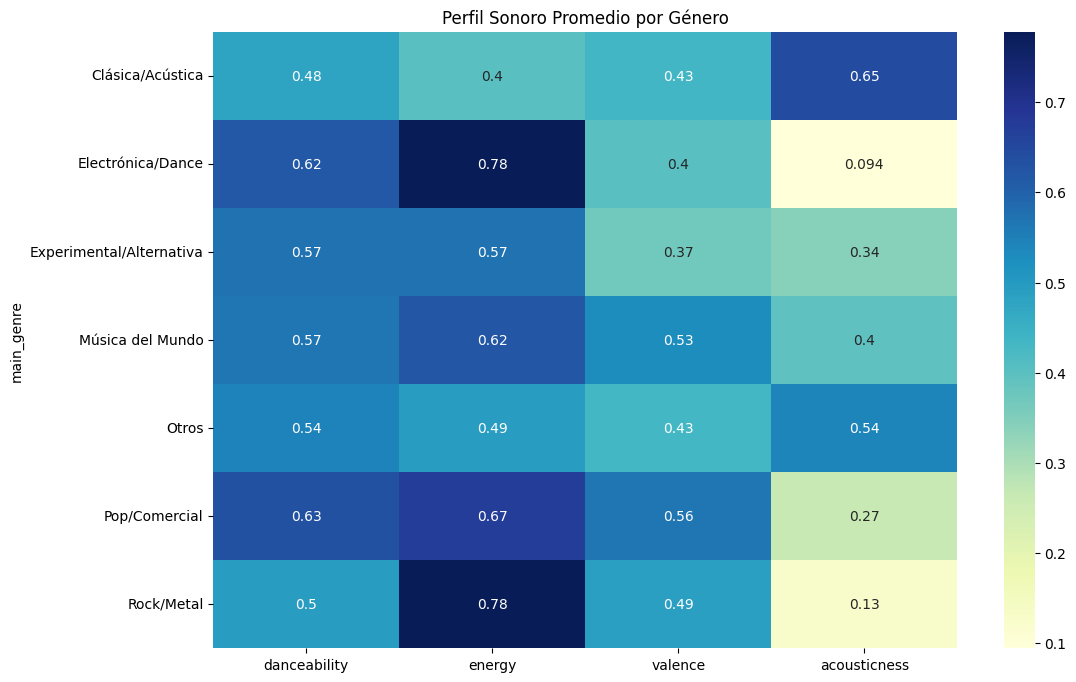

In [43]:
genre_means = df.groupby("main_genre")[["danceability","energy","valence","acousticness"]].mean()
plt.figure(figsize=(12,8))
sns.heatmap(genre_means.sort_index(), cmap="YlGnBu", annot=True)
plt.title("Perfil Sonoro Promedio por Género")
plt.show()


/tmp/ipython-input-3824037000.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=df, x="main_genre", y="tempo", inner="quartile", scale="count")


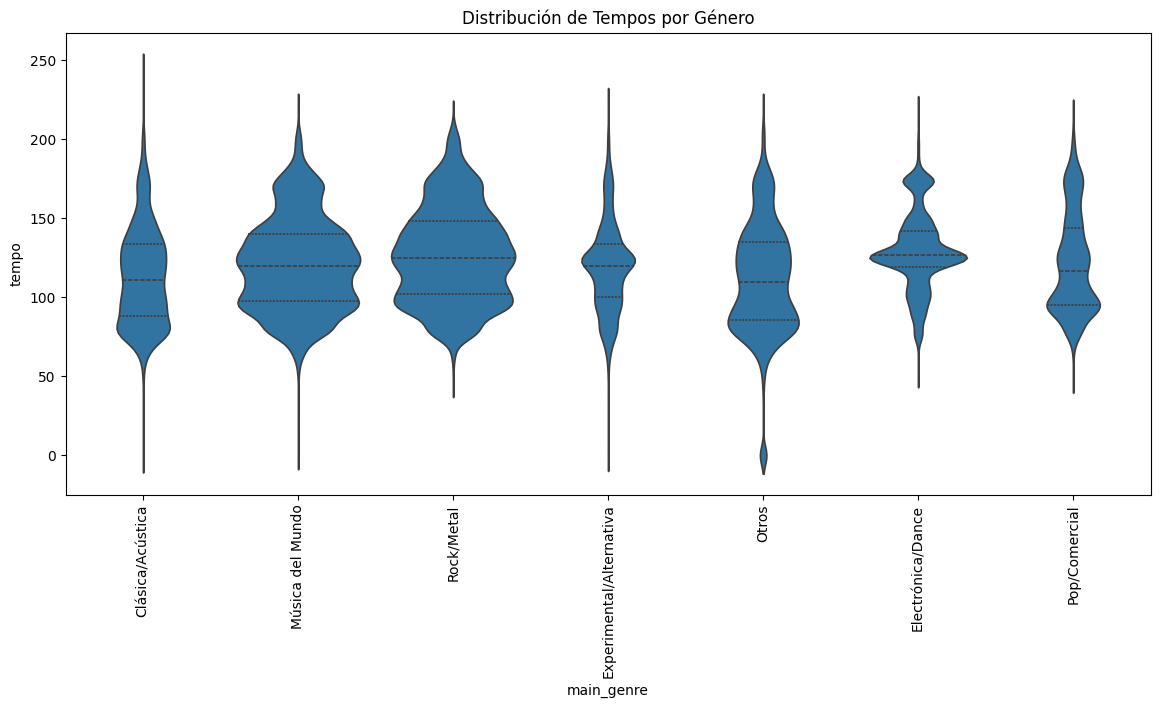

In [44]:
plt.figure(figsize=(14,6))
sns.violinplot(data=df, x="main_genre", y="tempo", inner="quartile", scale="count")
plt.xticks(rotation=90)
plt.title("Distribución de Tempos por Género")
plt.show()


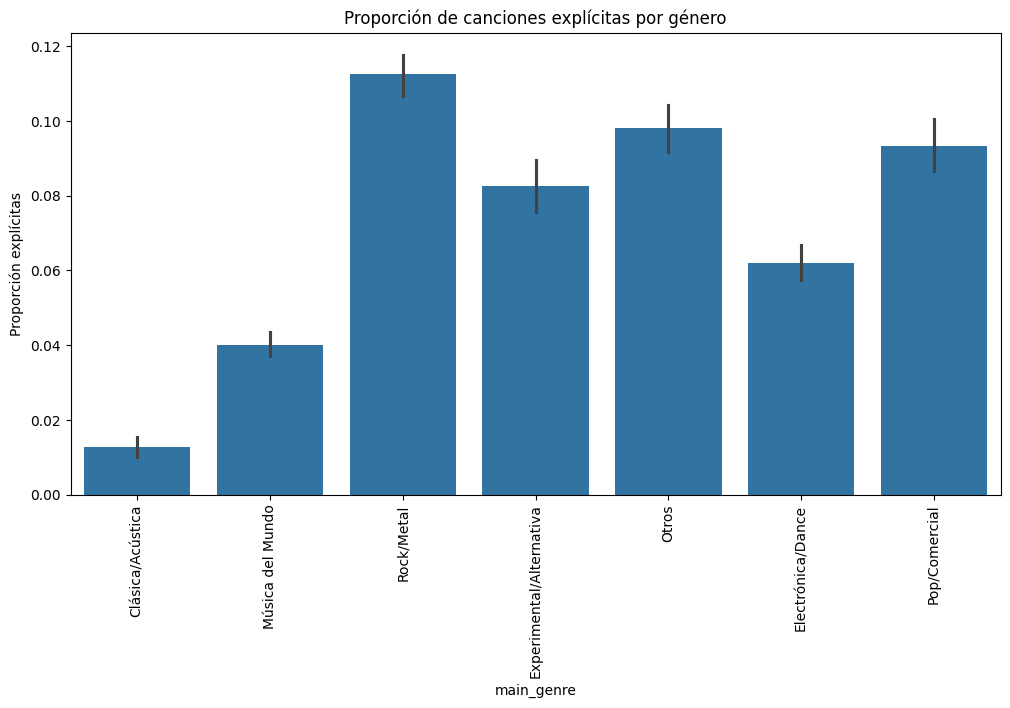

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="main_genre", y="explicit", estimator=np.mean)
plt.xticks(rotation=90)
plt.title("Proporción de canciones explícitas por género")
plt.ylabel("Proporción explícitas")
plt.show()


###Matriz de correlación de variables numéricas

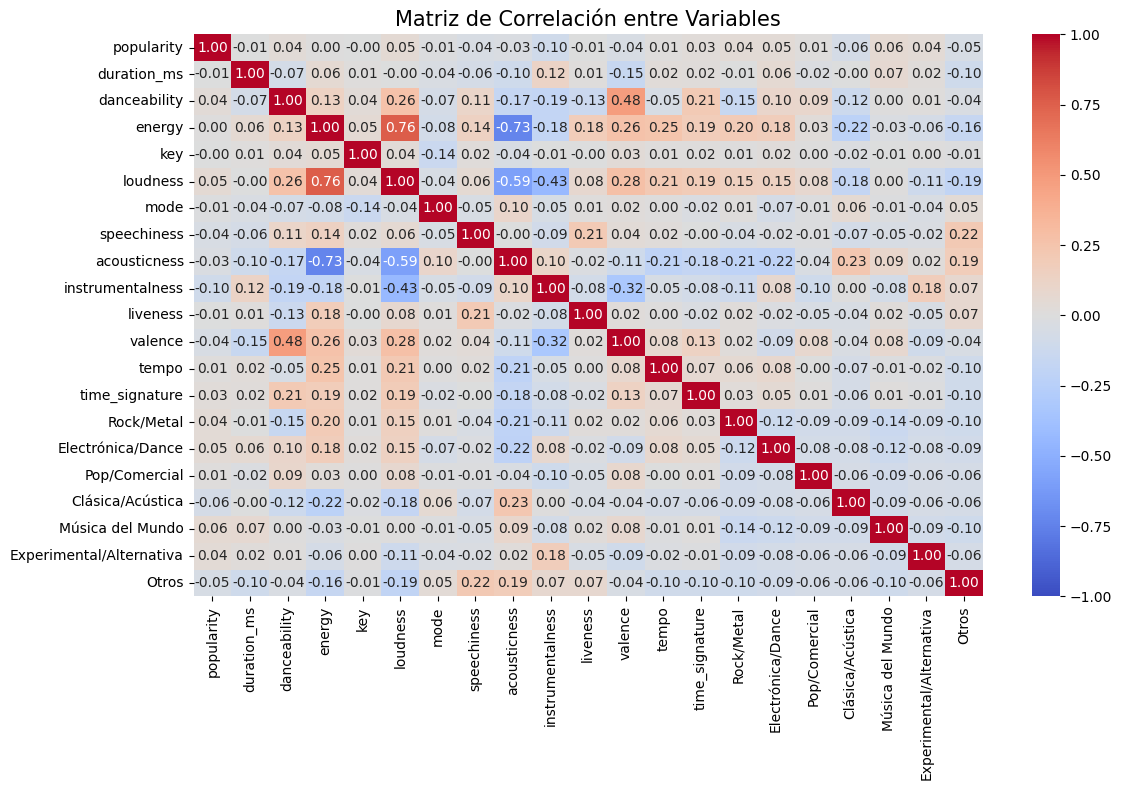

In [46]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.title('Matriz de Correlación entre Variables', fontsize=15)
plt.tight_layout()

plt.show()

Resumen: En general, la base de datos se puede considerar de buena calidad, pues se tienen muy pocos valores nulos y duplicados comparado con la magnitud total de registros. De igual manera, se hizo un análisis univariada de las variables para estudiar sus distribuciones y cómo se caracterizan las variables categóricas o de identificación como el nombre de la canción/álbum o el género al que pertenece. Relacionado con este último, se realizó un análisis basado en una agrupación de ellos con la popularidad y una variedad de características sonoras. Lo más relevante fue que la popularidad no encuentra correlaciones al respecto con la gran mayoría de las variables, lo que da indicio a un estudio más minucioso de los datos, donde se buscará con mayor profundidad alguna relación que salga de lo lineal.